# Bu programla Python'da ilk regresyon analizi yapılacaktır.

Bu programla basit doğrusal regresyon işlemlerimiz, kendi geliştirdiğimiz kütüphaneler tarafından yapılacaktır.

1. Gerekli Kütüphanelerin Çağrılması 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2. Regresyon Analizleri için Sınıf Tasarımı

In [ ]:
class Veri:

  # Girdi değerlerinin çağrılması
  def __init__(self,filename):
    self.file=filename
    self.figure1='Maaş-Tecrübe Eğrisi'
    self.figure2='Veri İlinti Analizi'
    self.toplam_x=0
    self.toplam_y=0
    self.toplam_x2=0
    self.toplam_y2=0
    self.toplam_xy=0
    self.y_fit=[]

  # Veri Yapısının oluşturulması
  def open_file(self):
    self.data=pd.read_csv(self.file,delimiter=';')

  # Veri Görselleştirme
  def plot(self):
    self.x=list(self.data.iloc[:,0]) # Bağımsız değişken
    self.y=list(self.data.iloc[:,-1]) # Bağımlı değişken

    plt.figure(self.figure1)
    plt.plot(self.x,self.y,'*r')
    plt.title('Regresyon Modeli')
    plt.xlabel('Tecrübe (Yıl)')
    plt.ylabel('Maaş ($)')
    plt.grid(True)

    plt.figure(self.figure2)
    sns.heatmap(self.data.corr(),annot=True)

  # Regresyon analizleri
  def regresyon(self):
    #doğrusal regresyon modeli oluşturma
    self.a=float(self.regression.coef_)
    self.b=float(self.regression.intercept_)
    self.n=len(self.x)

    for i in range(self.n):
      self.toplam_x=self.toplam_x+self.x[i]
      self.toplam_y=self.toplam_y+self.y[i]
      self.toplam_x2=self.toplam_x2+(self.x[i]**2)
      self.toplam_y2=self.toplam_y2+(self.y[i]**2)
      self.toplam_xy=self.toplam_xy+(self.x[i]*self.y[i])
    
    
    self.a=(self.n*self.toplam_xy-self.toplam_x*self.toplam_y)/(self.n*self.toplam_x2-self.toplam_x**2)
    self.b=(self.toplam_y*self.toplam_x2-self.toplam_x*self.toplam_xy)/(self.n*self.toplam_x2-self.toplam_x**2)
    self.r2=self.r2=(self.n*self.toplam_xy-self.toplam_x*self.toplam_y)/((self.n*self.toplam_x2-self.toplam_x**2)*(self.n*self.toplam_y2-self.toplam_y**2))**0.5
    print("slope={:.2f}".format(self.a))
    print("intercept={:.2f}".format(self.b))
    print("r2 score={:.2f}".format(self.r2))

  # Grafik güncelleme
  def plot_again(self):
    self.y_fit=[self.a*self.x[i]+self.b for i in range(self.n)]
    print(type(self.y_fit))
    plt.figure(self.figure1)
    plt.plot(self.x,self.y_fit,'-.b')

3. Ana Programı Çalıştırma

AttributeError: ignored

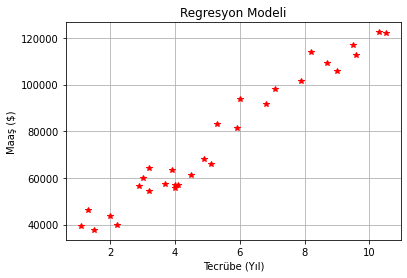

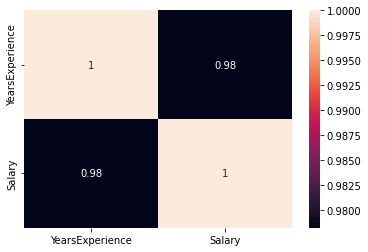

In [ ]:
dosya="salary.csv"
#print(type(dosya))
veri=Veri(dosya)
veri.open_file()
veri.plot()
veri.regresyon()
veri.plot_again()

slope=9449.96
intercept=25792.20
r2 score=0.96


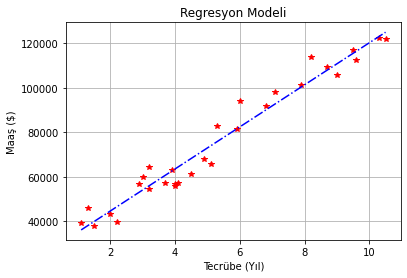

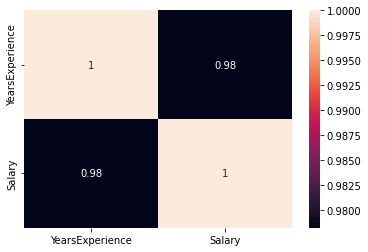

In [ ]:
dosya="salary.csv"
#print(type(dosya))
veri=Veri_2(dosya)
veri.open_file()
veri.plot()
veri.regresyon()
veri.plot_again()

slope=9449.96
intercept=25792.20
r2 score=0.96


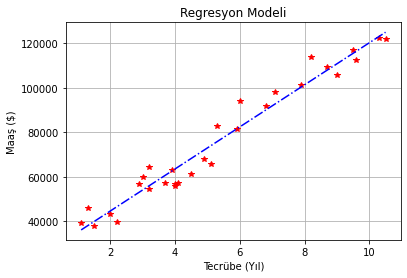

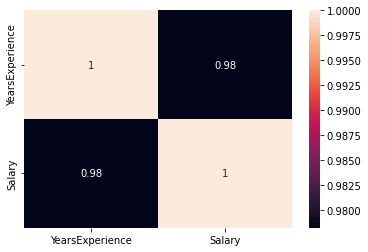

In [ ]:
dosya="salary.csv"
#print(type(dosya))
veri=Veri_2(dosya)
veri.open_file()
veri.plot()
veri.regresyon()
veri.plot_again()

# Doğrusal Regresyon Alternatif Yöntem

In [ ]:
from sklearn import linear_model
from sklearn.metrics import r2_score

class Veri_2:

  # Girdi değerlerinin çağrılması
  def __init__(self,filename):
    self.file=filename
    self.figure1='Maaş-Tecrübe Eğrisi'
    self.figure2='Veri İlinti Analizi'

  # Veri Yapısının oluşturulması
  def open_file(self):
    self.data=pd.read_csv(self.file,delimiter=';')

  # Veri Görselleştirme
  def plot(self):
    self.x=list(self.data.iloc[:,0]) # Bağımsız değişken
    self.y=list(self.data.iloc[:,-1]) # Bağımlı değişken

    plt.figure(self.figure1)
    plt.plot(self.x,self.y,'*r')
    plt.title('Regresyon Modeli')
    plt.xlabel('Tecrübe (Yıl)')
    plt.ylabel('Maaş ($)')
    plt.grid(True)

    plt.figure(self.figure2)
    sns.heatmap(self.data.corr(),annot=True)

  # Regresyon analizleri
  def regresyon(self):
    #doğrusal regresyon modeli oluşturma
    self.regression=linear_model.LinearRegression()
    
    self.x=np.array(self.x).reshape(-1,1)
    self.y=np.array(self.y).reshape(-1,1)
    self.regression.fit(self.x,self.y)
    
    # Model Parametrelerinin Tespiti
    self.a=float(self.regression.coef_)
    self.b=float(self.regression.intercept_)

    self.y_hat=self.a*self.x+self.b
    self.r2=r2_score(self.y,self.y_hat)
        
    print("slope={:.2f}".format(self.a))
    print("intercept={:.2f}".format(self.b))
    print("r2 score={:.2f}".format(self.r2))

  # Grafik güncelleme
  def plot_again(self):
    plt.figure(self.figure1)
    plt.plot(self.x,self.y_hat,'-.b')
    plt.legend(['Original Data','Fti Curve'])

slope=9449.96
intercept=25792.20
r2 score=0.96


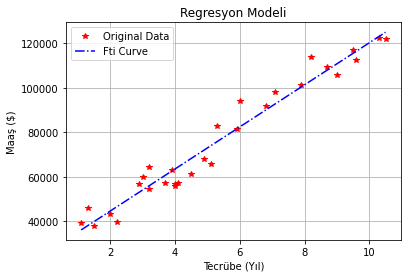

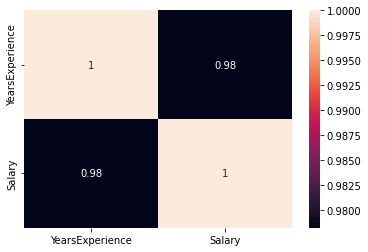

In [ ]:
dosya="salary.csv"
#print(type(dosya))
veri=Veri_2(dosya)
veri.open_file()
veri.plot()
veri.regresyon()
veri.plot_again()

# Çoklu Doğrusal Regresyon 

# kütüphane cagırma 

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import linear_model
#from sklearn import* #bu sekilde bütün elemanları cagırabiliriz 
from sklearn.metrics import r2_score

2. Dosyayı cagırma 

In [ ]:
veri=pd.read_csv('cars.csv')
print(type(veri),'\n')
print(veri.head(15),'\n')
print(veri.tail(10),'\n')

3. verinin bagımlı bagımsız değişkenlerinin belirlenmesi


In [ ]:
x=veri.iloc[:,2:-1]
y=veri.iloc[:,-1]
print(x)

4. regresyon modelinin oluşturulması 

In [ ]:
cok_reg=linear_model.LinearRegression()
cok_reg.fit(x,y)

print('Katsayılar={}'.format(cok_reg.coef_))
print('ofset={}'.format(cok_reg.intercept_))
# y= 79.695+0,0078(wolune)+0,0075(weight) model

Katsayılar=[0.00780526 0.00755095]
ofset=79.69471929115939


5. veri girdi ilinti analizi

In [ ]:
sns.heatmap(x.corr(),annot=True)

In [ ]:
sns.pairplot(x)

# polinom regresyon

In [ ]:
import numpy as np
from numpy.random import random,seed
from sklearn.metrics import r2_score

In [ ]:
from numpy.random import random as rn

1. fonksiyon oluşturma

In [ ]:
import numpy as np
from numpy.random import random,seed

In [ ]:
seed()
x=random(50)
x=np.sort(x)
print(x)
noise1=random(50)
noise2=random(50)

y=(1-noise1)*100*x+40*noise2
print(y)

[0.04990595 0.05135095 0.15167461 0.19834638 0.24323901 0.25676626
 0.26417266 0.28459056 0.35401066 0.36085107 0.3898303  0.39568244
 0.39773452 0.43259843 0.46108117 0.47006543 0.49130459 0.49825613
 0.51235236 0.54007197 0.5438937  0.56552246 0.58626864 0.59591071
 0.59728966 0.65729361 0.66131909 0.66626653 0.67038758 0.71535426
 0.73119231 0.74888434 0.76680207 0.77389978 0.77542196 0.7822649
 0.783665   0.80623044 0.81158158 0.81230828 0.81308903 0.83152707
 0.83977661 0.85576258 0.86253151 0.87631096 0.92471503 0.94386536
 0.96448317 0.9727639 ]
[  4.09092226  21.83877579  10.5538186   37.34440645  29.30084377
  19.80422832  27.78715076  56.00547217  62.58294394  37.66120118
  42.76067941  41.33474234  33.52159159  28.32032678  59.86229997
  26.12155787  46.80740329  29.17039754  26.02485307  39.60139198
  84.18713804  59.15035247  68.02304337  31.65143126  60.10313164
  85.84081258  62.09805392  39.71789716  48.94060872  95.40285995
  16.0582538   34.61380119  48.44888754  34.5

2. Grafiğe Aktarım

[  570.77149391 -1094.64962279   605.20862755   -28.78982586
    13.72938666]
r2 skoru= 0.18


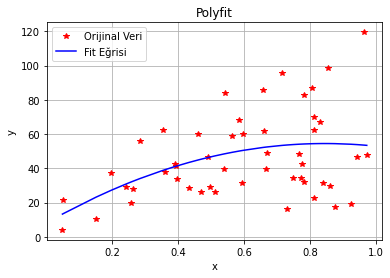

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Verinin Grafiğe Aktarımı
fig='Grafik-1'
plt.figure(fig)
plt.plot(x,y,'*r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.title('Polyfit')

# Polinom Regresyonu
pol_reg=np.poly1d(np.polyfit(x,y,2))
print(np.polyfit(x,y,4))
plt.plot(x,pol_reg(x),'-b')
plt.legend(['Orijinal Veri','Fit Eğrisi'])

# r2 skoru
print('r2 skoru= {:.2f}'.format(r2_score(y,pol_reg(x))))

# 3. polinom regresyonu 

[  570.77149391 -1094.64962279   605.20862755   -28.78982586
    13.72938666]


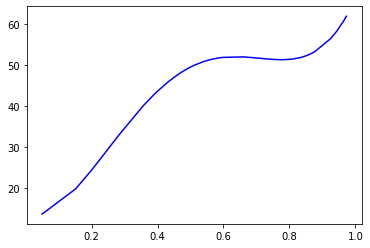

In [ ]:
pol_reg=np.poly1d(np.polyfit(x,y,4))
print(np.polyfit(x,y,4))
plt.figure(fig)
plt.plot(x,pol_reg(x),'-b')